In [31]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [32]:
# loading the dataset from csv file using pandas
calories = pd.read_csv("/kaggle/input/fmendesdat263xdemos/calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [33]:
exercise_data = pd.read_csv("/kaggle/input/fmendesdat263xdemos/exercise.csv")

In [34]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [35]:
#combining the two dataframe calories and exercise
calories_data = pd.concat([exercise_data, calories["Calories"]], axis = 1) # here axis =1 means columns and axis = 0 means rows

In [36]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [37]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [38]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [39]:
# checking for missing valuesa
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [40]:
# get some statitstical measures about the data 
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [41]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

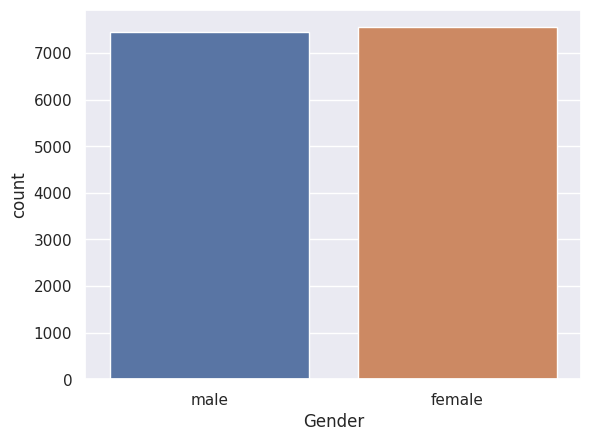

In [42]:
# plotting the gender column in count plot
sns.countplot(x = 'Gender', data = calories_data)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

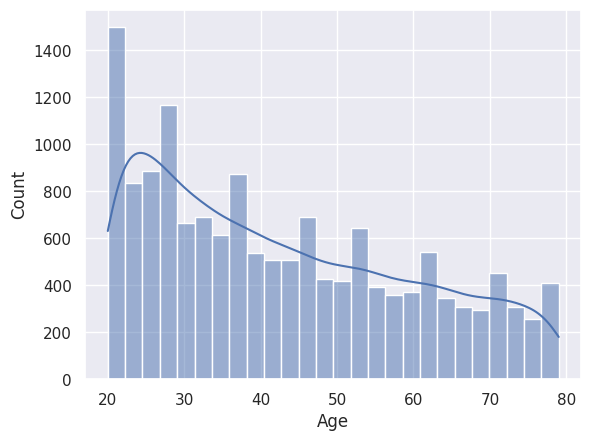

In [43]:
# finding the distribution of "Age" column
sns.histplot(calories_data['Age'],kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

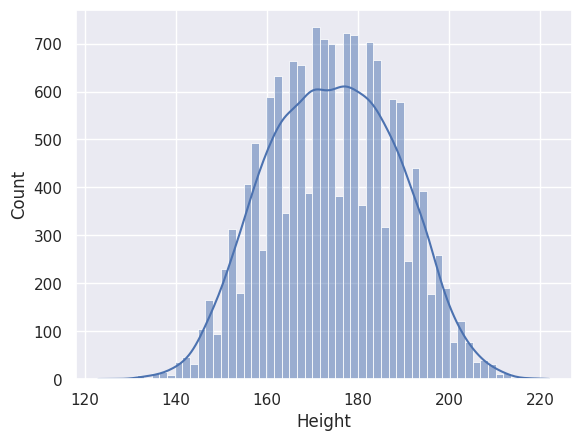

In [44]:
# finding the distribution of "Height" column
sns.histplot(calories_data['Height'],kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

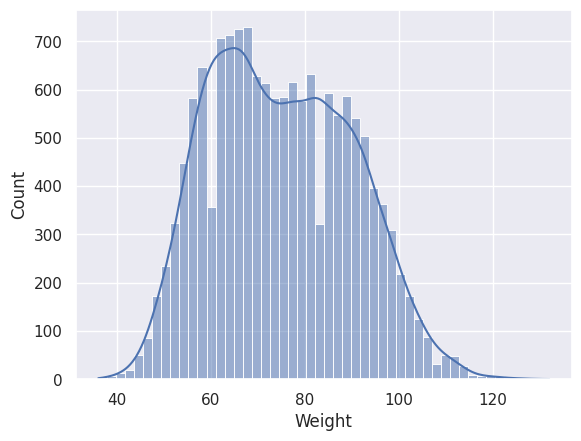

In [45]:
# finding the distribution of "Weight" column
sns.histplot(calories_data['Weight'],kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Duration', ylabel='Count'>

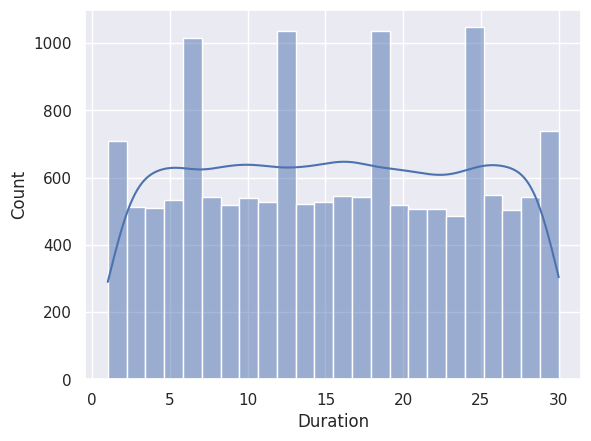

In [46]:
# finding the distribution of "Duration" column
sns.histplot(calories_data['Duration'],kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Heart_Rate', ylabel='Count'>

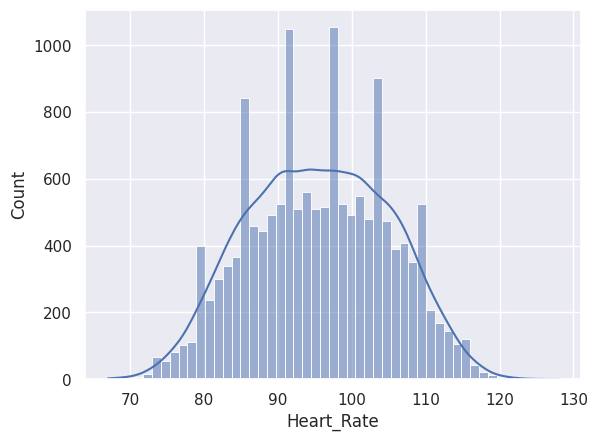

In [47]:
# finding the distribution of "Heart_Rate" column
sns.histplot(calories_data['Heart_Rate'],kde = True)

Finding the correlation in the dataset

1. Positive correlation
2. Negative correlation

In [48]:
# correlation calculate only numerical data
numeric_data = calories_data.select_dtypes(include = ['number'])

In [49]:
correlation_matrix = numeric_data.corr()

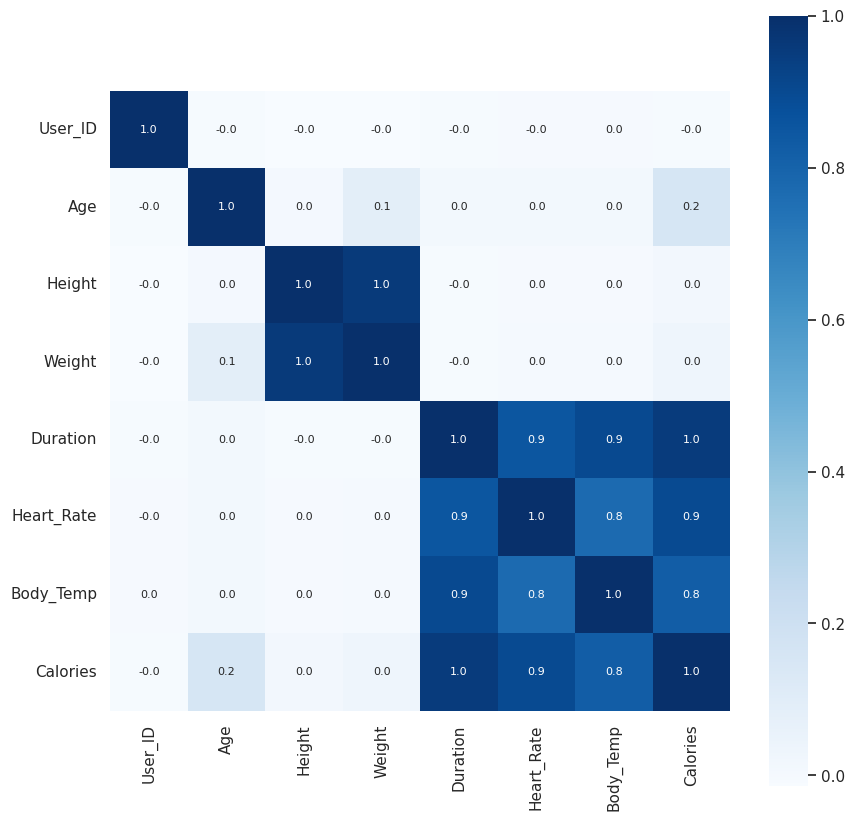

In [50]:
# constructing a heatmap to understand the correlation

plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, cbar = True, cmap = 'Blues', square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8})
plt.show()

Converting the text data to numerical values

In [51]:
calories_data['Gender'] = calories_data['Gender'].replace({'male':0,'female':1}).astype(int)

<ipython-input-51-1f5d977b7729>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data['Gender'] = calories_data['Gender'].replace({'male':0,'female':1}).astype(int)


In [52]:
# separated features and target columns
"""features = calories_data.iloc[: , : 8].values
target = calories_data.iloc[:, -1].values"""
#more dynamic
features = calories_data.drop(['User_ID','Calories'],axis = 1)
target = calories_data['Calories']

In [53]:
features

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [54]:
target

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [55]:
# spliting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


**Model Train**

In [57]:
# XG Boost Regressor
model = XGBRegressor() # loading the model

In [58]:
#training the model with x_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation
prediction on test data

In [60]:
test_data_prediction = model.predict(X_test)

In [61]:
print(test_data_prediction)

[ 42.158726  16.409174  99.261345 ...  26.832329 148.18468  153.74557 ]


Mean Absolute Error

In [63]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [65]:
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  1.5211099035541216
